<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [13.1 Parallel Computing Basics](chapter13.01-Parallel-Computing-Basics.ipynb) | [Contents](Index.ipynb) | [13.3 Use joblib](chapter13.03-Use-joblib.ipynb) >

# Multiprocessing

The multiprocessing library is the Python's standard library to support parallel computing using processes. It has many different features, if you want to know all the details, you can check the [official documentation](https://docs.python.org/3/library/multiprocessing.html). Here we will introduce the basics to get you start with parallel computing. Let's start by importing the library. 

In [1]:
import multiprocessing as mp

Let's first print out the total number of CPUs that on my machine that can be used for parallel computing.

In [2]:
print(f"Number of cpu: {mp.cpu_count()}")

Number of cpu: 12


Let's use an example to show you how to use multiple cores in one machine to reduce the time of execution time. 

**EXAMPLE:** Generate 10,000,000 random numbers between 0 and 10, and square the number. Store the results in a list. 

## Serial version

In [3]:
import numpy as np
import time

def random_square(seed):
    np.random.seed(seed)
    random_num = np.random.randint(0, 10)
    return random_num**2

In [4]:
t0 = time.time()
results = []
for i in range(10000000): 
    results.append(random_square(i))
t1 = time.time()
print(f'Execution time {t1 - t0} s')

Execution time 32.9464430809021 s


## Parallel version

The simplest way to do parallel computing using the multiprocessing is to use the **Pool** class. There are 4 common methods in the class that we may use often, that is *apply*, *map*, *apply_async* and *map_async*. Have a look of the documentation for the differences, and we will only use *map* function below to parallel the above example. The *map(func, iterable)* function takes in two arguments, and apply the function *func* to each element in the *iterable*, and then collect the results. 

In [5]:
t0 = time.time()
n_cpu = mp.cpu_count()

pool = mp.Pool(processes=n_cpu)
results = [pool.map(random_square, range(10000000))]
t1 = time.time()
print(f'Execution time {t1 - t0} s')

Execution time 6.066138744354248 s


We can see that using the above parallel version of the code, we reduce the run time from ~38 s to ~7 s. This is a big gain in speed, especially if we have a heavy computation, it will reduce a lot of time by running parallel computing. 

The `pool.apply` function is similar except that it can accept more arguments. The `pool.map` and `pool.apply` will lock the main program until all the processes are finished, which is quite useful if we want to obtain results in a particular order for some applications. In contrast, if we do not need the results in a particular order, we can also use `pool.apply_async` or `pool.map_async`, which will submit all processes at once and retrieve the results as soon as they are finished. Check online to learn more. 

## Visualize the execution time 

Let's visualize the execution time changes versus the number of data points using both the serial and parallel version. And you will see that until certain point, it is better to use the serial version. 

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

def serial(n):
    t0 = time.time()
    results = []
    for i in range(n): 
        results.append(random_square(i))
    t1 = time.time()
    exec_time = t1 - t0
    return exec_time

def parallel(n):
    t0 = time.time()
    n_cpu = mp.cpu_count()

    pool = mp.Pool(processes=n_cpu)
    results = [pool.map(random_square, range(n))]
    t1 = time.time()
    exec_time = t1 - t0
    return exec_time

In [ ]:
n_run = np.logspace(1, 7, num = 7)

t_serial = [serial(int(n)) for n in n_run]
t_parallel = [parallel(int(n)) for n in n_run]

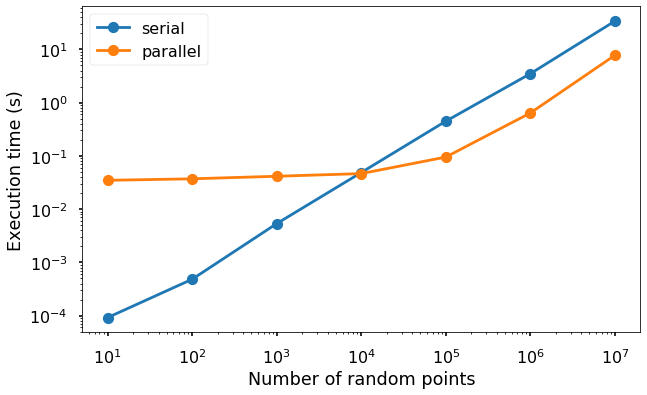

In [8]:
plt.figure(figsize = (10, 6))
plt.plot(n_run, t_serial, '-o', label = 'serial')
plt.plot(n_run, t_parallel, '-o', label = 'parallel')
plt.loglog()
plt.legend()
plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')
plt.show()

We can see from the figure that when the number of data points are small (below 10000), the execution time for the serial version is faster due to the overheads of the parallel version from launching and maintaining the new processes. But after that, we can see clearly the winner be the parallel version. 

<!--NAVIGATION-->
< [13.1 Parallel Computing Basics](chapter13.01-Parallel-Computing-Basics.ipynb) | [Contents](Index.ipynb) | [13.3 Use joblib](chapter13.03-Use-joblib.ipynb) >